<a href="https://colab.research.google.com/github/jamiepratt/lingq/blob/main/bulk_change_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

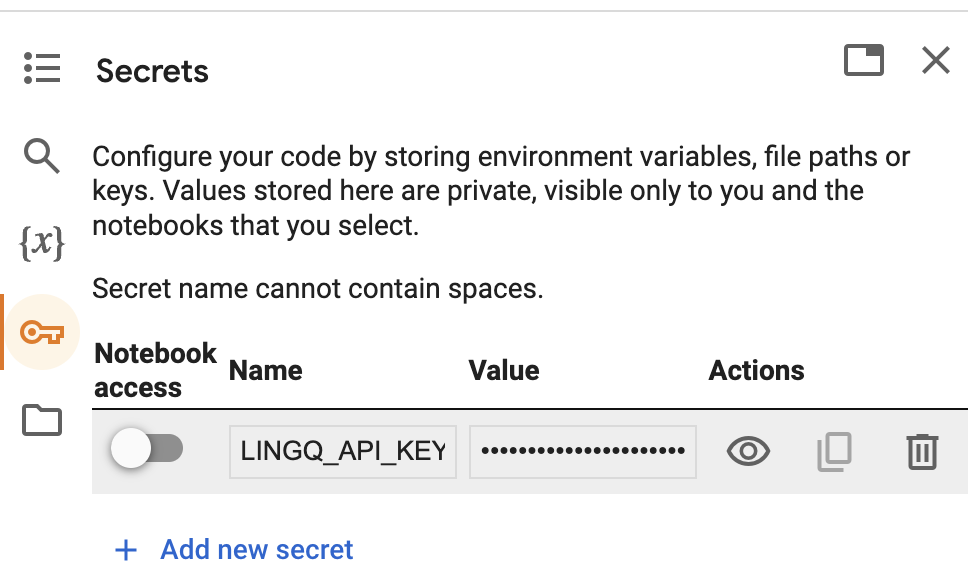

Set your api key by opening the side panel to the left.

In [ ]:
#Using Google colab secrets to store keys.
from google.colab import userdata
import requests

#API URL
BASE_URL = "https://www.lingq.com/api/v3"

#LANGUAGE
LANGUAGE = "pl"

lingq_api_key=userdata.get('LINGQ_API_KEY');
headers = {
    'Authorization': f'Token {lingq_api_key}',
    'Content-Type': 'application/json'
}


def get_lesson_ids(course_id):
    response = requests.get(f"{BASE_URL}/{LANGUAGE}/collections/{course_id}/lessons/", headers=headers)
    if response.status_code == 200:
        lesson_ids = [result['id'] for result in response.json()['results']]
        return lesson_ids
    else:
        print(f"Failed to get lesson IDs for course {course_id}. Status code: {response.status_code}")
        return []

def patch_lesson_to_new_course(lesson_id, new_course_id):
    """
    Patch a lesson to a new course ID.
    """
    LESSON_URL = f"{BASE_URL}/{LANGUAGE}/lessons/{lesson_id}/"
    payload = {
        "collection": new_course_id,
        "language": LANGUAGE
    }

    response = requests.patch(LESSON_URL, json=payload, headers=headers)

    if response.status_code == 200:
        print(f"Successfully patched lesson {lesson_id} to course {new_course_id}.")
    else:
        print(f"Failed to patch lesson {lesson_id}. Status code: {response.status_code}")

def update_lessons_to_new_course(initial_course_id, new_course_id):
    """
    Update lessons from the initial course ID to a new course ID.
    """
    # Fetch lesson IDs for the initial course.
    lesson_ids = get_lesson_ids(initial_course_id)
    if not lesson_ids:
        print("No lessons found for the given initial course ID.")
        return

    # Patch each lesson to the new course ID.
    for lesson_id in lesson_ids:
        patch_lesson_to_new_course(lesson_id, new_course_id)




In [ ]:
initial_course_id = 1546584   # @param {type: "number"}

new_course_id = 1440209 # @param {type: "number"}
update_lessons_to_new_course(initial_course_id, new_course_id)

Failed to get lesson IDs for course 1546584. Status code: 404
No lessons found for the given initial course ID.
